# Atomic Vibrations

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# seed for random number generator
random.seed(1234)

In [ ]:
N      = 1000   # Number of atoms in the chain
MA     = 1.0    # Mass of A atoms
MB     = 2.0    # Mass of B atoms
C      = 0.5    # Concentration of B atoms
NP     = 100    # Number of averages
NL     = 1000   # Number of frequencies
LMIN   = 0.0    # Minimum frequency
LMAX   = 5.0    # Maximum frequency
FILENAME = "DatosNL.txt"

alphard = [0] * N  # Reduced masses
idosrd  = [0] * NL  # Accumulative density modes

alphaic = [0] * N  # Reduced masses
idosic  = [0] * NL  # Accumulative density modes

def massrand():
    for i in range(N):
        alphard[i] = 1.0 if random.random() >= C else MB / MA

def massic():
    for i in range(0, N, 2):
        alphaic[i] = 1.0
        alphaic[i + 1] = MB / MA

def main():
    dlambda = (LMAX - LMIN) / NL
    out     = open(FILENAME, "w")

    for j in range(NL):
        idosrd[j] = 0.0
        idosic[j] = 0.0
    massrand()
    massic()
    for i in range(NP):
        for j in range(NL):
            rard = 0.0
            raic = 0.0
            for k in range(N):
                rdrd = 2.0 - alphard[k] * (LMIN + dlambda * j) - rard
                if abs(rdrd) < 1e-50:
                    idosrd[j] += 1
                    k += 1
                    rard = 0.0
                else:
                    if rdrd < 0:
                        idosrd[j] += 1
                    rard = 1. / rdrd
            for k in range(N):
                rdic = 2.0 - alphaic[k] * (LMIN + dlambda * j) - raic
                if abs(rdic) < 1e-50:
                    idosic[j] += 1
                    k += 1
                    raic = 0.0
                else:
                    if rdic < 0:
                        idosic[j] += 1
                    raic = 1. / rdic

    for j in range(NL):
        out.write(f"{LMIN + dlambda * j:.10f}\t")
        out.write(f"{idosic[j] / (N*NP):.10f}\t")
        out.write(f"{idosrd[j] / (N*NP):.10f}\n")

    out.close()

if __name__ == "__main__":
    main()

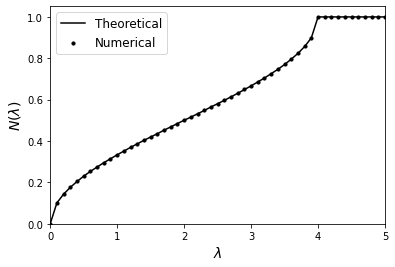

In [2]:
dataL = np.loadtxt("DatosL.txt")
dataL = dataL.T
fig, ax = plt.subplots(1,1)
ax.plot(dataL[0], dataL[1], linestyle="-", color="k", label="Theoretical")
ax.scatter(dataL[0], dataL[2], marker=".", s=40, color="k", label="Numerical")
ax.set_xlabel(r"$\lambda$", fontsize=14)
ax.set_ylabel(r"$N\left(\lambda\right)$", fontsize=14)
ax.set_xlim(0,5)
ax.set_ylim(0,1.05)
plt.legend(fontsize=12)
plt.savefig("Lineal Lattice.png")
plt.show()

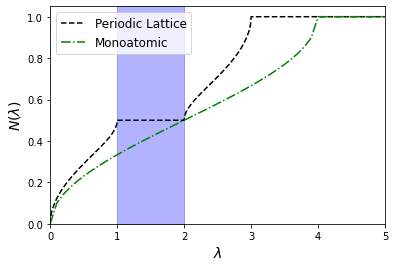

In [3]:
dataNL = np.loadtxt("DatosNL.txt")
dataNL = dataNL.T
fig, ax = plt.subplots(1,1)
ax.plot(dataNL[0], dataNL[1], linestyle="--", color="k", label="Periodic Lattice")
#ax.plot(dataNL[0], dataNL[2], linestyle="-", color="crimson", label="Disordered Lattice")
ax.plot(dataL[0], dataL[2], linestyle="-.", color="g", label="Monoatomic")
ax.fill_between(np.linspace(1,2,10), 0.0, 1.05, color="b", alpha=0.3)
ax.set_xlabel(r"$\lambda$", fontsize=14)
ax.set_ylabel(r"$N\left(\lambda\right)$", fontsize=14)
ax.set_xlim(0,5)
ax.set_ylim(0,1.05)
plt.legend(fontsize=12)
plt.savefig("NonLineal Lattice DiaTo.png")
plt.show()

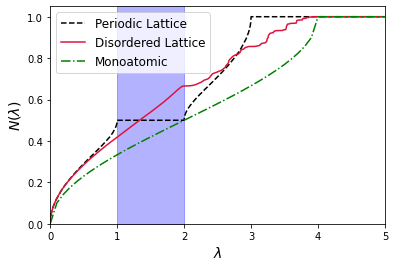

In [4]:
dataNL = np.loadtxt("DatosNL.txt")
dataNL = dataNL.T
fig, ax = plt.subplots(1,1)
ax.plot(dataNL[0], dataNL[1], linestyle="--", color="k", label="Periodic Lattice")
ax.plot(dataNL[0], dataNL[2], linestyle="-", color="crimson", label="Disordered Lattice")
ax.plot(dataL[0], dataL[2], linestyle="-.", color="g", label="Monoatomic")
ax.fill_between(np.linspace(1,2,10), 0.0, 1.05, color="b", alpha=0.3)
ax.set_xlabel(r"$\lambda$", fontsize=14)
ax.set_ylabel(r"$N\left(\lambda\right)$", fontsize=14)
ax.set_xlim(0,5)
ax.set_ylim(0,1.05)
plt.legend(fontsize=12)
plt.savefig("NonLineal Lattice DiaTo.png")
plt.show()

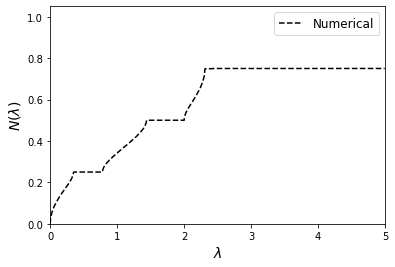

In [13]:
dataNL = np.loadtxt("DatosNL.txt")
dataNL = dataNL.T
fig, ax = plt.subplots(1,1)
ax.plot(dataNL[0], dataNL[1], linestyle="--", color="k", label="Numerical")
#ax.plot(dataNL[0], dataNL[2], linestyle="-", color="crimson", label="Disordered Lattice")
#ax.plot(dataL[0], dataL[2], linestyle="-.", color="g", label="Monoatomic")
#ax.fill_between(np.linspace(1,2,10), 0.0, 1.05, color="b", alpha=0.3)
ax.set_xlabel(r"$\lambda$", fontsize=14)
ax.set_ylabel(r"$N\left(\lambda\right)$", fontsize=14)
ax.set_xlim(0,5)
ax.set_ylim(0,1.05)
plt.legend(fontsize=12)
plt.savefig("NonLineal Lattice DiaTo.png")
plt.show()